# Tempora - Climate Analysis 

Himesh Dulal (20), Avipsa Parajuli (37), Aayusha Shrestha (50), Pratistha Thapa (57), Abhinav Lamsal (68)

## <b>Summary </b>
The project uses numerical methods like Interpolation, Linear Regression, Polynomial Fit + Extrapolation and Newton Raphson Method for analysis and predicting the climate data of data set provided as per csv.

## 1. Loading the CSV Data

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def load_and_prepare_data(filepath):
    df = pd.read_csv(filepath)
    df = df.sort_values(['Year', 'Month']).reset_index(drop=True)
    return df

In [58]:
def linear_interpolate_series(series):
    result = series.copy()
    for i in range(len(series)):
        if pd.isna(series[i]):
            # Find previous known value
            prev_index = i - 1
            while prev_index >= 0 and pd.isna(series[prev_index]):
                prev_index -= 1

            # Find next known value
            next_index = i + 1
            while next_index < len(series) and pd.isna(series[next_index]):
                next_index += 1

            if prev_index >= 0 and next_index < len(series):
                # Perform linear interpolation
                x0, y0 = prev_index, series[prev_index]
                x1, y1 = next_index, series[next_index]
                x = i
                result[i] = y0 + (x - x0) * (y1 - y0) / (x1 - x0)

    return result

In [59]:
def clean_data(df):
    print("Data with Missing Values:")
    print(df[['Year', 'Month', 'Temp_2m', 'Precip']][df['Temp_2m'].isna() | df['Precip'].isna()])

    cleaned_df = df.copy()

    cleaned_df['Temp_2m'] = linear_interpolate_series(cleaned_df['Temp_2m'])
    cleaned_df['Precip'] = linear_interpolate_series(cleaned_df['Precip'])

    print("\n After Cleaning:")
    print(cleaned_df[['Year', 'Month', 'Temp_2m', 'Precip']])

    # Plot before vs after
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(df['Temp_2m'], label='Original Temp')
    plt.plot(cleaned_df['Temp_2m'], label='Cleaned Temp', linestyle='--')
    plt.title('Temperature - Before vs After Interpolation')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(df['Precip'], label='Original Rain')
    plt.plot(cleaned_df['Precip'], label='Cleaned Rain', linestyle='--')
    plt.title('Rainfall - Before vs After Interpolation')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return cleaned_df

Data with Missing Values:
     Year  Month    Temp_2m  Precip
6    2000      7        NaN  179.69
9    2000     10        NaN     NaN
15   2001      4        NaN    7.24
24   2002      1        NaN   13.65
28   2002      5  28.223226     NaN
30   2002      7  28.718065     NaN
40   2003      5  28.689355     NaN
45   2003     10        NaN   23.75
58   2004     11  17.193333     NaN
70   2005     11  16.501667     NaN
84   2007      1  13.198710     NaN
86   2007      3        NaN   33.50
88   2007      5  28.276774     NaN
91   2007      8  24.908387     NaN
93   2007     10        NaN   34.16
99   2008      4  25.978000     NaN
104  2008      9        NaN  220.39
107  2008     12  15.259032     NaN
109  2009      2        NaN    0.99
113  2009      6        NaN  122.74
114  2009      7        NaN  284.86
124  2010      5  28.999677     NaN
133  2011      2  16.187500     NaN
143  2011     12        NaN    0.60
152  2012      9        NaN  409.08
166  2013     11  17.132333     NaN
16

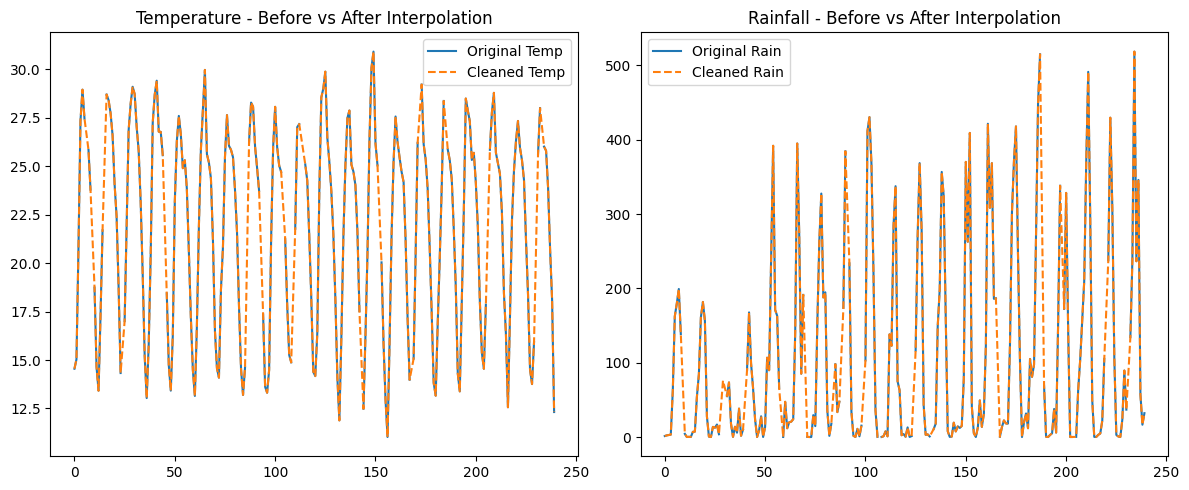

In [60]:
district= "Chitawan"
filepath=f"data/final_data/{district}.csv"
df= load_and_prepare_data(filepath)
cleaned_df = clean_data(df)

In [61]:
def visualize_trends(df):
    # Group by year
    yearly_df = df.groupby('Year').agg({
        'Temp_2m': 'mean',
        'Precip': 'sum'
    }).reset_index()

    plt.figure(figsize=(10, 5))

    plt.plot(yearly_df['Year'], yearly_df['Temp_2m'], color='orange', marker='o', label='Avg Temp (°C)')
    plt.plot(yearly_df['Year'], yearly_df['Precip'], color='blue', marker='s', label='Total Rainfall (mm)')

    plt.title(f'Climate Trends in {district} (2000–2019)')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


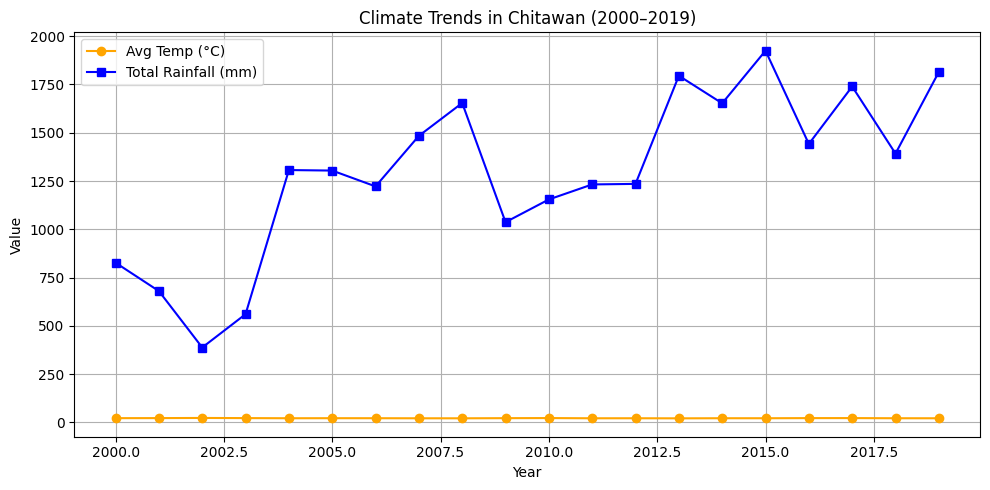

In [62]:
visualize_trends(cleaned_df)

In [64]:
def compare_trends_by_year(df_original, df_cleaned):
    # Group both datasets by year
    yearly_orig = df_original.groupby('Year').agg({
        'Temp_2m': 'mean',
        'Precip': 'sum'
    }).reset_index()

    yearly_cleaned = df_cleaned.groupby('Year').agg({
        'Temp_2m': 'mean',
        'Precip': 'sum'
    }).reset_index()

    # Plot comparison
    plt.figure(figsize=(12, 6))

    # Temperature
    plt.subplot(1, 2, 1)
    plt.plot(yearly_orig['Year'], yearly_orig['Temp_2m'], label='Original Avg Temp', color='orange', marker='x')
    plt.plot(yearly_cleaned['Year'], yearly_cleaned['Temp_2m'], label='Interpolated Avg Temp', color='green', linestyle='--', marker='o')
    plt.title('Yearly Avg Temperature (2000–2019)')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)

    # Rainfall
    plt.subplot(1, 2, 2)
    plt.plot(yearly_orig['Year'], yearly_orig['Precip'], label='Original Rainfall', color='blue', marker='x')
    plt.plot(yearly_cleaned['Year'], yearly_cleaned['Precip'], label='Interpolated Rainfall', color='purple', linestyle='--', marker='o')
    plt.title('Yearly Rainfall Totals (2000–2019)')
    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


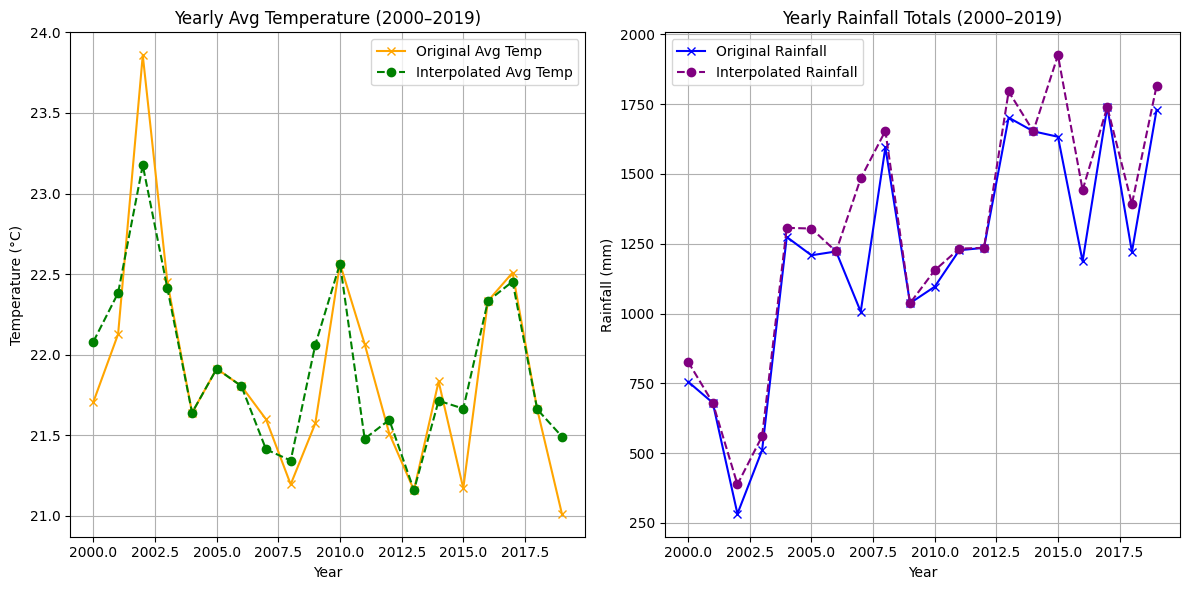

In [65]:
compare_trends_by_year(df, cleaned_df)

In [66]:
def fit_polynomial_manual(x, y, degree):
    if degree != 2:
        raise NotImplementedError("Only degree 2 is implemented manually.")

    n = len(x)
    sum_x = sum(x)
    sum_x2 = sum(xi**2 for xi in x)
    sum_x3 = sum(xi**3 for xi in x)
    sum_x4 = sum(xi**4 for xi in x)

    sum_y = sum(y)
    sum_xy = sum(xi * yi for xi, yi in zip(x, y))
    sum_x2y = sum((xi**2) * yi for xi, yi in zip(x, y))

    A = [
        [n,      sum_x,   sum_x2],
        [sum_x,  sum_x2,  sum_x3],
        [sum_x2, sum_x3,  sum_x4]
    ]
    B = [sum_y, sum_xy, sum_x2y]

    # Gaussian elimination
    for i in range(3):
        divisor = A[i][i]
        for j in range(3):
            A[i][j] /= divisor
        B[i] /= divisor

        for k in range(i + 1, 3):
            factor = A[k][i]
            for j in range(3):
                A[k][j] -= factor * A[i][j]
            B[k] -= factor * B[i]

    coeffs = [0, 0, 0]
    for i in range(2, -1, -1):
        coeffs[i] = B[i] - sum(A[i][j] * coeffs[j] for j in range(i + 1, 3))

    return coeffs



df_reg = cleaned_df[['Year', 'Month', 'Temp_2m', 'Precip']].dropna().copy() #selecting only the relevent column
df_reg['TimeIndex'] = (df_reg['Year'] - df_reg['Year'].min()) * 12 + df_reg['Month'] #Creates a continuous month-wise index 

In [67]:

x_actual = df_reg['TimeIndex'].values #defining x_actual=month from 2000-2019
months_to_forecast = 12 * (2026 - 2019)
x_future = np.arange(x_actual.max() + 1, x_actual.max() + 1 + months_to_forecast) #defining x_future = month from 2020 to 2026

In [68]:

def make_labels(start_year, start_month, total_months): # Create year, month label for the Xaxis
    labels = []
    year, month = start_year, start_month
    for _ in range(total_months):
        labels.append(f"{year}-{str(month).zfill(2)}")
        month += 1
        if month > 12:
            month = 1
            year += 1
    return labels


In [69]:

x_all = np.concatenate([x_actual, x_future]) #Splits those labels into historical and future parts for plotting.
all_labels = make_labels(2000, 1, len(x_all))
actual_labels = all_labels[:len(x_actual)]
future_labels = all_labels[len(x_actual):]

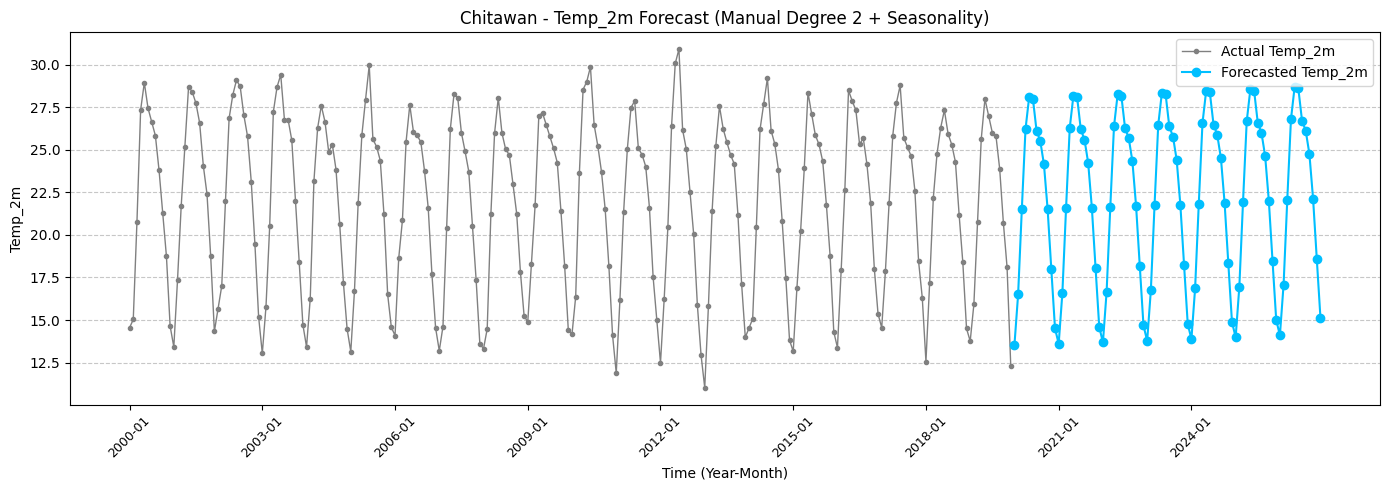

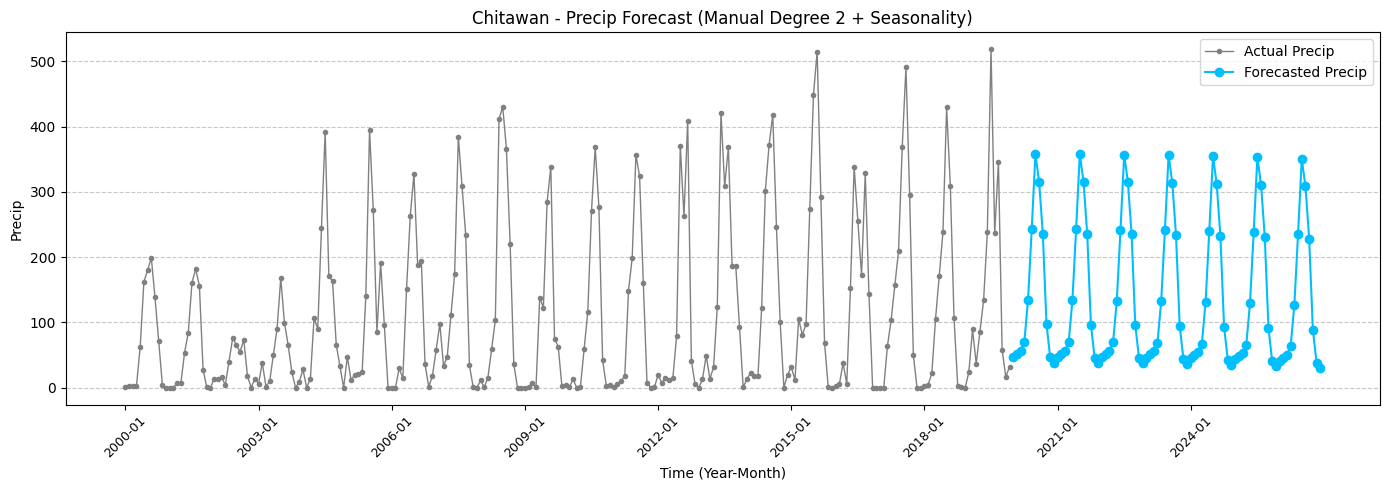

In [72]:
features = ["Temp_2m", "Precip"]
degree = 2

for feature in features:
    y_actual = list(df_reg[feature])
    coeffs = fit_polynomial_manual(x_actual, y_actual, degree)

    # manual prediction for trend
    trend_future = [coeffs[0] + coeffs[1] * xi + coeffs[2] * xi**2 for xi in x_future]

    # Add Seasonality Back
    month_avg = df_reg.groupby("Month")[feature].mean()
    future_months = pd.Series((pd.Series(x_future) - 1) % 12 + 1)
    seasonal_offsets = future_months.map(month_avg) - month_avg.mean()
    y_forecast = [t + s for t, s in zip(trend_future, seasonal_offsets)]

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(actual_labels, y_actual, color='gray', label=f'Actual {feature}', marker='.', linewidth=1)
    plt.plot(future_labels, y_forecast, color='deepskyblue', label=f'Forecasted {feature}', marker='o', linestyle='-')

    plt.title(f"{district} - {feature} Forecast (Manual Degree 2 + Seasonality)")
    plt.xlabel("Time (Year-Month)")
    plt.ylabel(feature)

    tick_interval = 36
    xtick_positions = list(range(0, len(all_labels), tick_interval))
    xtick_labels = [all_labels[i] for i in xtick_positions]
    plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45, fontsize=9)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [73]:
# Crop recommendation based on average temperature and precipitation

def recommend_crop(avg_temp, avg_precip):
    """
    Simple rule-based crop recommendation.
    You can expand this dictionary as needed for your region.
    """
    crop_table = [
        {"crop": "Rice", "temp_range": (20, 30), "precip_range": (150, 300)},
        {"crop": "Maize", "temp_range": (18, 27), "precip_range": (50, 150)},
        {"crop": "Wheat", "temp_range": (10, 25), "precip_range": (30, 100)},
        {"crop": "Millet", "temp_range": (18, 32), "precip_range": (50, 150)},
        {"crop": "Barley", "temp_range": (12, 25), "precip_range": (20, 80)},
        {"crop": "Mustard", "temp_range": (10, 25), "precip_range": (20, 60)},
        {"crop": "Potato", "temp_range": (15, 20), "precip_range": (50, 120)},
    ]
    recommendations = []
    for entry in crop_table:
        tmin, tmax = entry["temp_range"]
        pmin, pmax = entry["precip_range"]
        if tmin <= avg_temp <= tmax and pmin <= avg_precip <= pmax:
            recommendations.append(entry["crop"])
    return recommendations if recommendations else ["No suitable crop found"]

# Calculate average temperature and precipitation for the data
district_avg_temp = df['Temp_2m'].mean()
district_avg_precip = df['Precip'].mean()

recommended_crops = recommend_crop(district_avg_temp, district_avg_precip)
print(f"Average Temp: {district_avg_temp:.2f}°C, Average Precip: {district_avg_precip:.2f} mm")
print(f"Recommended crops for {district}:", ", ".join(recommended_crops))

Average Temp: 21.89°C, Average Precip: 108.57 mm
Recommended crops for Chitawan: Maize, Millet


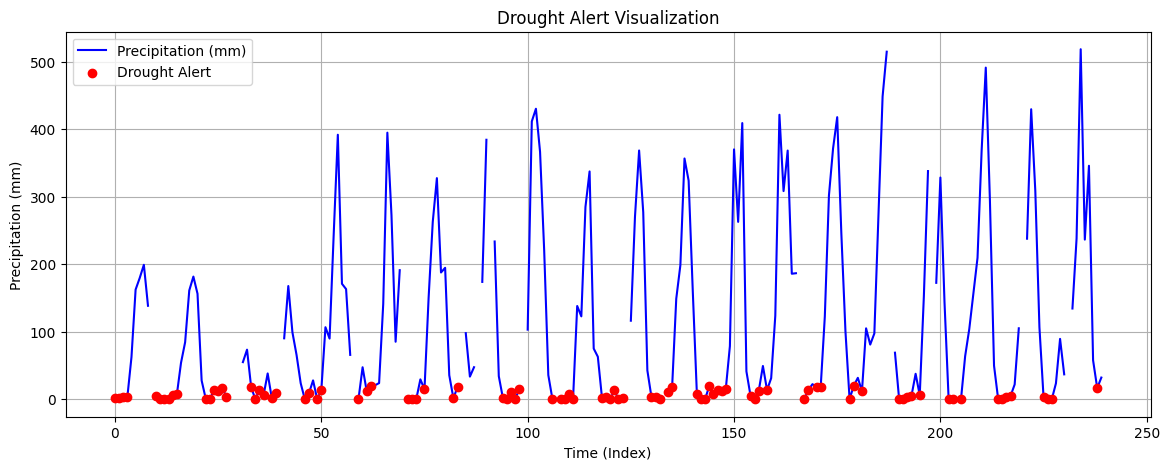

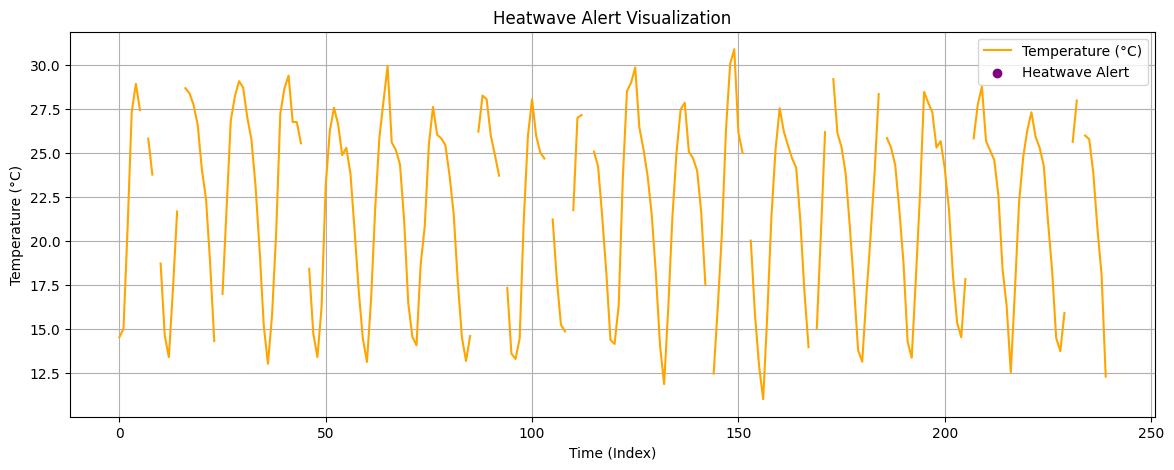

In [74]:
# Drought and Heatwave Alert Visualization

# Define thresholds (can be adjusted as needed)
drought_precip_threshold = 20  # mm (monthly precipitation below this is considered drought)
heatwave_temp_threshold = 32   # °C (monthly average temperature above this is considered heatwave)

# Identify drought and heatwave months
drought_months = df[(df['Precip'] < drought_precip_threshold)]
heatwave_months = df[(df['Temp_2m'] > heatwave_temp_threshold)]

plt.figure(figsize=(14, 5))
plt.plot(df['TimeIndex'] if 'TimeIndex' in df.columns else range(len(df)), df['Precip'], label='Precipitation (mm)', color='blue')
plt.scatter(drought_months['TimeIndex'] if 'TimeIndex' in drought_months.columns else drought_months.index, drought_months['Precip'], color='red', label='Drought Alert', zorder=5)
plt.ylabel('Precipitation (mm)')
plt.xlabel('Time (Index)')
plt.title('Drought Alert Visualization')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
plt.plot(df['TimeIndex'] if 'TimeIndex' in df.columns else range(len(df)), df['Temp_2m'], label='Temperature (°C)', color='orange')
plt.scatter(heatwave_months['TimeIndex'] if 'TimeIndex' in heatwave_months.columns else heatwave_months.index, heatwave_months['Temp_2m'], color='purple', label='Heatwave Alert', zorder=5)
plt.ylabel('Temperature (°C)')
plt.xlabel('Time (Index)')
plt.title('Heatwave Alert Visualization')
plt.legend()
plt.grid(True)
plt.show()
